## Survival Prediction In titanic

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.shape

(891, 12)

In [6]:
#removing null colums
df=df.drop(columns=['Age','Cabin','Embarked'],axis=1)
df.shape

(891, 9)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


# Analizing the dataset by useing Visualizations

<Axes: ylabel='Sex'>

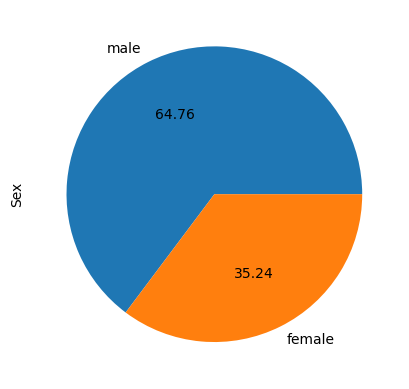

In [8]:
df.Sex.value_counts().plot(kind='pie',autopct="%.2f")

<Axes: ylabel='Pclass'>

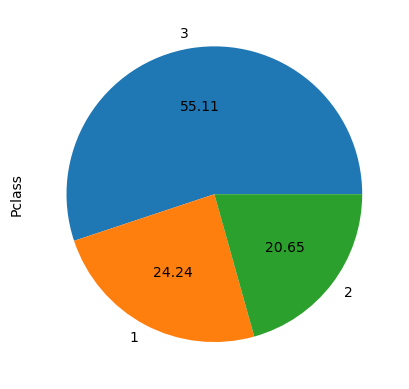

In [9]:
df.Pclass.value_counts().plot(kind='pie',autopct="%.2f")

<Axes: xlabel='Pclass', ylabel='Survived'>

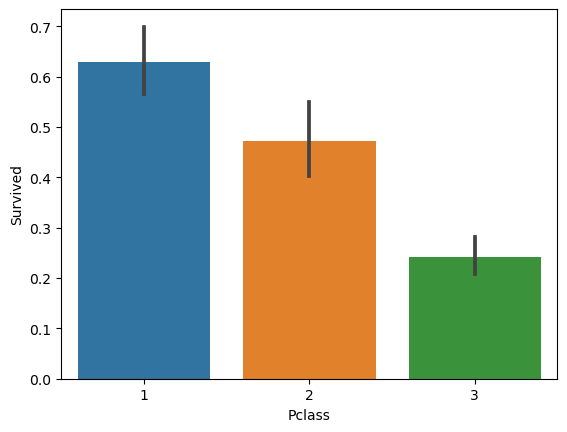

In [10]:
sns.barplot(x=df.Pclass,y=df.Survived)

<Axes: xlabel='Sex', ylabel='Survived'>

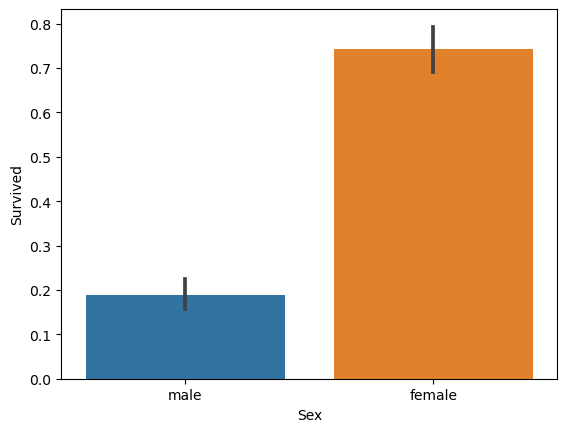

In [11]:
sns.barplot(x=df.Sex,y=df.Survived)

In [12]:
df_corr=df.corr()

C:\Users\amira\AppData\Local\Temp\ipykernel_11988\4097978709.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr()


C:\Users\amira\AppData\Local\Temp\ipykernel_11988\2923080492.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


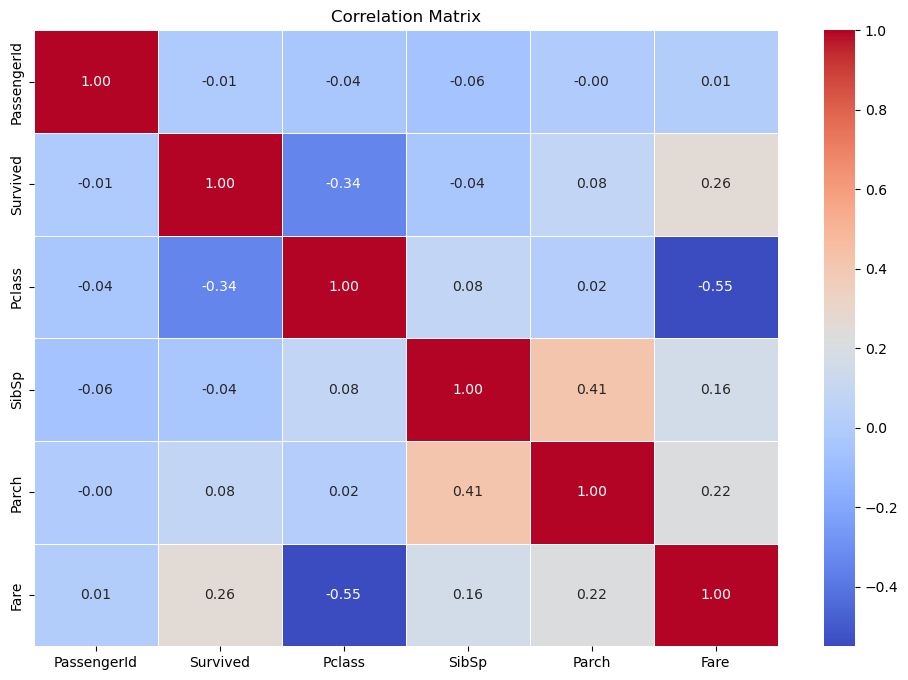

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
#changing catagorical to numerical in colums
df['Sex'] = df['Sex'].str.strip().replace({'male': 1, 'female': 0})

# Now Lets build the model

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500


In [16]:
#feature selection for models 
df=df.drop(columns=['Name','Ticket','PassengerId','Fare'])

## Train test split

In [17]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='Survived',axis=1)
Y=df['Survived']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

## Model Selection


In [18]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, random_state=1)

##Finding the accuracy Score and RMSe

In [19]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
prediction=model.predict(X_test)
# Calculate RMSE (Root Mean Squared Error)
rmse=sqrt(mean_squared_error(Y_test,prediction))
accuracy=accuracy_score(Y_test,prediction)
print(accuracy)

0.7821229050279329


In [20]:
print(f"RMSE Score: {rmse}")

RMSE Score: 0.46677306581685607
